In [3]:
from elasticsearch import helpers 
from collections import MutableMapping
import pandas as pd
import numpy as np

def flatten(nested_dict, parent_key=''):
    items = []
    for k, v in nested_dict.items():
        if isinstance(v, MutableMapping):
            items.extend(flatten(v, k).items())
        else:
            items.append((k, v))
    return dict(items)
    
    
query = {
  "sort": [
    {
      "timestamp": "desc"
    }
  ],
  "query": {
    "match_phrase": {
      "event": "Search result selected"
    }
  },
  "size": 10000
}

response = es.search(
    body=query,
    index="search_relevance_implicit"
)

df = pd.DataFrame([
    flatten(event['_source']) for event in response['hits']['hits']
])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  


In [4]:
#note: Python client automatically indexes from latest to earliest.  To check start date:

sorted=df.sort_values(by=['timestamp'], ascending=True) 
sorted.head()

,event,anonymousId,timestamp,network,toggles,_queryType,aggregations,items.locations.locationType,page,production.dates.from,...,sort,sortOrder,workType,id,position,resultIdentifiers,resultSubjects,resultWorkType,source,resultLanguage
9999,Search result selected,abf8d9e0-6c52-4fa1-90c0-c14bb8a60e7c,2020-02-27T11:31:50.030Z,None,[altNewsletterSignupCopy:false],NaN,[workType],"[iiif-image, iiif-presentation]",1,None,...,None,None,"[a, g, i, k, l, q]",wyu2kntx,4,"[b11750315, 1175031, V0011855, ICV No 12121]","[Medical consultation., Laughter., Nuns., Phys...",Pictures,work_result,French
9998,Search result selected,abf8d9e0-6c52-4fa1-90c0-c14bb8a60e7c,2020-02-27T11:31:50.080Z,None,[altNewsletterSignupCopy:false],NaN,[workType],"[iiif-image, iiif-presentation]",1,None,...,None,None,"[a, g, i, k, l, q]",wyu2kntx,4,"[b11750315, 1175031, V0011855, ICV No 12121]","[Medical consultation., Laughter., Nuns., Phys...",Pictures,work_result,French
9997,Search result selected,abf8d9e0-6c52-4fa1-90c0-c14bb8a60e7c,2020-02-27T11:32:10.519Z,None,[altNewsletterSignupCopy:false],NaN,[workType],"[iiif-image, iiif-presentation]",1,None,...,None,None,"[a, g, i, k, l, q]",ar6tap8f,10,"[b11757590, 1175759, V0011946, ICV No 12212]","[Confession., Guilt., Boys - Health and hygien...",Pictures,work_result,German
9996,Search result selected,abf8d9e0-6c52-4fa1-90c0-c14bb8a60e7c,2020-02-27T11:32:10.551Z,None,[altNewsletterSignupCopy:false],NaN,[workType],"[iiif-image, iiif-presentation]",1,None,...,None,None,"[a, g, i, k, l, q]",ar6tap8f,10,"[b11757590, 1175759, V0011946, ICV No 12212]","[Confession., Guilt., Boys - Health and hygien...",Pictures,work_result,German
9995,Search result selected,53e5c341-8e3f-4925-86d7-81da81658b68,2020-02-27T11:32:38.442Z,None,[],BoolBoosted,[workType],"[iiif-image, iiif-presentation]",1,None,...,None,None,"[a, g, i, k, l, q]",aca7jkma,0,"[b31415933, 3141593]","[Health Services Administration., Public Healt...",Books,work_result,English


In [5]:
#data cleansing

df=df.loc[df['network'] != 'StaffCorporateDevices'] #remove staff usage
#df=df.loc[df['timestamp'] > '2019-11-07 00:00:00']  #only use searches after AND implemented
#df=df.loc[df['event'] != 'Search landing']

df2=df.loc[df['timestamp'] >= '2020-03-01 00:00:00']  #grabs 2 days' of data, ie from 1/3/20


df2.head(5)

,event,anonymousId,timestamp,network,toggles,_queryType,aggregations,items.locations.locationType,page,production.dates.from,...,sort,sortOrder,workType,id,position,resultIdentifiers,resultSubjects,resultWorkType,source,resultLanguage
0,Search result selected,c60b8a80-d17f-41d9-bb4b-63824a06d7e6,2020-03-04T10:26:41.474Z,None,[altNewsletterSignupCopy:true],BoolBoosted,[workType],"[iiif-image, iiif-presentation]",3,None,...,None,None,"[a, g, i, k, l, q]",p2ydukh7,4,"[L0063734, b16795520, EPH EPH501:27]",[],Digital Images,work_result,NaN
1,Search result selected,1834cc03-4e28-4c67-abbc-767347f7e033,2020-03-04T10:26:12.358Z,None,[altNewsletterSignupCopy:true],BoolBoosted,[workType],"[iiif-image, iiif-presentation]",1,None,...,None,None,"[a, g, i, k, l, q]",dgkmvaxj,0,"[b1193086x, 1193086, V0029721, ICV No 30202]",[],Pictures,work_result,English
2,Search result selected,c60b8a80-d17f-41d9-bb4b-63824a06d7e6,2020-03-04T10:26:10.896Z,None,[altNewsletterSignupCopy:true],BoolBoosted,[workType],"[iiif-image, iiif-presentation]",1,None,...,None,None,"[a, g, i, k, l, q]",jfquc2az,23,"[L0063744, b16795799, EPH EPH501:32]",[],Digital Images,work_result,NaN
3,Search result selected,c60b8a80-d17f-41d9-bb4b-63824a06d7e6,2020-03-04T10:25:59.630Z,None,[altNewsletterSignupCopy:true],BoolBoosted,[workType],"[iiif-image, iiif-presentation]",1,None,...,None,None,"[a, g, i, k, l, q]",x2jg3p2t,1,"[L0066859, Science Museum E2009.121.3]","[Leaflet, Douche]",Digital Images,work_result,NaN
4,Search result selected,a082322b-7333-4db9-8bd7-f08080831ed0,2020-03-04T10:25:55.175Z,None,[altNewsletterSignupCopy:false],ConstScore,[workType],"[iiif-image, iiif-presentation]",57,None,...,production.dates,asc,"[a, g, i, k, l, q]",tbepbc3m,22,"[b11841606, 1184160, V0019470, ICV No 19869]","[Vomiting., Sick., Tobacco use., Tobacco pipes...",Pictures,work_result,NaN


In [6]:
df.sort_values(by=['anonymousId','timestamp'])
unique_selects=df.drop_duplicates(subset='anonymousId', keep='first')
unique_selects.head(5)

,event,anonymousId,timestamp,network,toggles,_queryType,aggregations,items.locations.locationType,page,production.dates.from,...,sort,sortOrder,workType,id,position,resultIdentifiers,resultSubjects,resultWorkType,source,resultLanguage
0,Search result selected,c60b8a80-d17f-41d9-bb4b-63824a06d7e6,2020-03-04T10:26:41.474Z,None,[altNewsletterSignupCopy:true],BoolBoosted,[workType],"[iiif-image, iiif-presentation]",3,None,...,None,None,"[a, g, i, k, l, q]",p2ydukh7,4,"[L0063734, b16795520, EPH EPH501:27]",[],Digital Images,work_result,NaN
1,Search result selected,1834cc03-4e28-4c67-abbc-767347f7e033,2020-03-04T10:26:12.358Z,None,[altNewsletterSignupCopy:true],BoolBoosted,[workType],"[iiif-image, iiif-presentation]",1,None,...,None,None,"[a, g, i, k, l, q]",dgkmvaxj,0,"[b1193086x, 1193086, V0029721, ICV No 30202]",[],Pictures,work_result,English
4,Search result selected,a082322b-7333-4db9-8bd7-f08080831ed0,2020-03-04T10:25:55.175Z,None,[altNewsletterSignupCopy:false],ConstScore,[workType],"[iiif-image, iiif-presentation]",57,None,...,production.dates,asc,"[a, g, i, k, l, q]",tbepbc3m,22,"[b11841606, 1184160, V0019470, ICV No 19869]","[Vomiting., Sick., Tobacco use., Tobacco pipes...",Pictures,work_result,NaN
5,Search result selected,244fed3f-5cc6-4bc7-b0fc-487cec05ca1f,2020-03-04T10:25:27.181Z,None,[altNewsletterSignupCopy:false],BoolBoosted,[workType],"[iiif-image, iiif-presentation]",1,None,...,None,None,"[a, g, i, k, l, q]",djanaf3v,1,"[L0007579, Slide number 6104]",[Drugs],Digital Images,work_result,NaN
6,Search result selected,6d794572-26af-43a9-8a25-106d1da63048,2020-03-04T10:25:12.808Z,None,[],ConstScore,[workType],"[iiif-image, iiif-presentation]",1,None,...,None,None,"[a, g, i, k, l, q]",rwdp5aw5,9,"[b31416640, 3141664]",[India.],Books,work_result,English


In [30]:
#How many workIds?
summary=unique_selects.groupby('id').count()[['anonymousId']]
summary


,anonymousId
id,
a26h3zea,1
a2db4236,1
a2v5cb84,1
a2y8dwm6,1
a34zd9qn,1
...,...
zv8f5aan,1
zvz4qqu4,1
zxdtz27j,1


In [56]:
#How many workIds viewed once?
viewed_once=summary.loc[summary['anonymousId']<=1]
count=viewed_once['anonymousId'].count()
print(count)

1996


In [57]:
#How many workIds viewed twice?
viewed_twice=summary.loc[summary['anonymousId']==2]
count=viewed_twice['anonymousId'].count()
print(count)

89


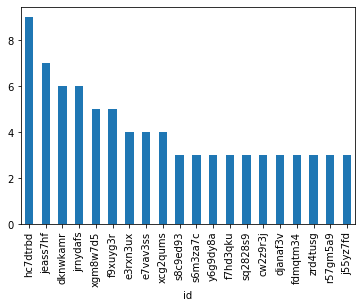

In [74]:
#Create bar chart for workIds viewed more than twice.

summary.sort_values(by='anonymousId', ascending=False)[:20].plot.bar(legend=False)

In [59]:
#calculate skewness

skew=summary.skew()
print(skew)

anonymousId    9.84555
dtype: float64


In [60]:
#output data to csv to check

summary.to_csv('skew_for_2_days.csv') 